## Analyze A/B Test Results-Project-3
### Analysis done by Cherif Arsanious

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these tests.

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

<font color=red>To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

<font color=red>a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read the ab_data and viewing its first 
#10 rows to get a grasp of the data
df=pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


<font color=red>b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Number of rows in the dataset
print('The number of rows in this dataset is:',df.shape[0])

The number of rows in this dataset is: 294478


<font color=red>c. The number of unique users in the dataset.

In [4]:
#Number of unique users 
print('The number of unique users is:',df['user_id'].nunique())

The number of unique users is: 290584


<font color=red>d. The proportion of users converted.

In [5]:
#proportion of users converted either on the new page or the old page
print('The proportion of users that converted is:',df.query('converted==1').shape[0]/df['converted'].shape[0])

The proportion of users that converted is: 0.11965919355605512


<font color=red>e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#Rows where group is treatment but landing page is not new_page
df_mismatch1=df.query('(group=="treatment") & (landing_page!="new_page")')
df_mismatch1.head()

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0


In [7]:
#number of Rows where group is treatment but landing page is not new_page
df_mismatch1.shape[0]

1965

In [8]:
#Rows where group is not treatment but landing page is new_page
df_mismatch2=df.query('(group!="treatment") & (landing_page=="new_page")')
df_mismatch2.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1


In [9]:
#Number of Rows where group is not treatment but landing page is new_page
df_mismatch2.shape[0]

1928

<font color =#2267B6>*I noticed the last two line of codes doesn't give the same output and neither of them is enough alone to answer the question but actually the sum of both is the right answer.*

In [10]:
#Number of times where treatment and new_page don't match 
df_mismatch1.shape[0]+df_mismatch2.shape[0]

3893

<font color=red>f. Do any of the rows have missing values?

In [11]:
#Checking if any of the columns in the dataset contains null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  

<font color=red>a. Create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
index1=df.query('(group=="treatment") & (landing_page!="new_page")').index
index2=df.query('(group!="treatment") & (landing_page=="new_page")').index
df1=df.drop(index1)
df2=df1.drop(index2)

In [13]:
df2.shape[0]

290585

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions 

<font color=red>a. How many unique **user_id**s are in **df2**?

In [15]:
print('The Number of unique users in our data is:',df2['user_id'].nunique())

The Number of unique users in our data is: 290584


<font color=red>b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2['user_id'].duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


<font color=red>c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


<font color=red>d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
#removing the duplicated row of repeated user
df2=df2.drop(2893)

`4.` Use **df2** in the cells below to answer the questions.

<font color=red>a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
#Probability of an individual converting regardless new_page or old_page
df2_cr=df2.query('converted==1').shape[0]/df2.shape[0]
df2_cr

0.11959708724499628

<font color=red>b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2_control=df2.query('group=="control"')
cr_control=df2_control.query('converted==1').shape[0]/df2_control.shape[0]
print('The probability of conversion for individual in the control group is:\n',cr_control)

The probability of conversion for individual in the control group is:
 0.1203863045004612


<font color=red>c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2_treatment=df2.query('group=="treatment"')
cr_treatment=df2_treatment.query('converted==1').shape[0]/df2_treatment.shape[0]
print('The probability of conversion for individual in the treatment group is: \n',cr_treatment)

The probability of conversion for individual in the treatment group is: 
 0.11880806551510564


<font color=red>d. What is the probability that an individual received the new page?

In [22]:
#probability of individual receiving the new_page
df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]

0.5000619442226688

<font color=red>e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [23]:
#duration of test
print(df2['timestamp'].min(),df2['timestamp'].max())

2017-01-02 13:42:05.378582 2017-01-24 13:41:54.460509


<font color=#2267B6>*The good thing to start with is that the old and new page received 50% each of our users so there is no primary bias.
The probability of conversion for the new_page is 11.88% and the the probability of conversion for the old_page is 12.04%. The observed difference is 11.88%-12.04%=-0.16%.  I can not say i have sufficient evidence to conclude that the new treatment page leads to more conversion just by these probability without testing if this observed difference is statistically significant or not.Also the test was run for 22 days which could be or not(depending on domain expert) a short time frame to dilute the effect of change aversion where the users are afraid of change from the new page layout and the opposite effect where users are bored with old layout. More indepth analysis should be made*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<font color=#2267B6>
Null Hypothesis $H0: pnew-pold=<0$ <br>
Alternate Hypothesis $H1: pnew-pold >0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.<br><br>

#### <font color=#2267B6> I used two methods to answer this task and both resulted in the same answer. \
    Method 1

In [24]:
df2_control=df2.query('group=="control"')
cr_control=df2_control.query('converted==1').shape[0]/df2_control.shape[0]
print('The probability of conversion for individual in the control group is:\n',cr_control)
df2_treatment=df2.query('group=="treatment"')
cr_treatment=df2_treatment.query('converted==1').shape[0]/df2_treatment.shape[0]
print('The probability of conversion for individual in the treatment group is: \n',cr_treatment)


The probability of conversion for individual in the control group is:
 0.1203863045004612
The probability of conversion for individual in the treatment group is: 
 0.11880806551510564


In [25]:
#compute the observed difference in conversion rate between the new and old page
obs_diff=cr_treatment-cr_control
obs_diff

-0.0015782389853555567

In [26]:
#create a sample distribution of the diff with bootstrapping
diffs=[]
size=df2.shape[0]
for _ in range(10000):
    b_sample=df2.sample(size,replace=True)
    control_df=b_sample.query('group=="control"')
    treatment_df=b_sample.query('group=="treatment"')
    control_cr=control_df.query('converted==1').shape[0]/control_df.shape[0]
    treatment_cr=treatment_df.query('converted==1').shape[0]/treatment_df.shape[0]
    diffs.append(treatment_cr-control_cr)
#convert diffs to np array
diffs=np.array(diffs)

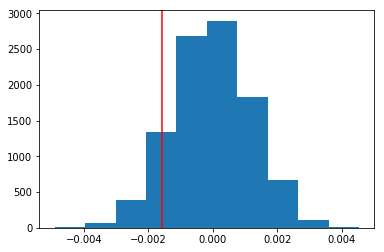

In [27]:
#simulate distribution under the null hypothesis
#plot null hypothesis
#plot the observed statistic
null_vals=np.random.normal(0,diffs.std(),diffs.size)
plt.hist(null_vals)
plt.axvline(x=obs_diff,color='red');

In [30]:
#compute pvalue 
pval=(null_vals>obs_diff).mean()
pval

0.90100000000000002

### Method2

<font color=red>a. What is the **conversion rate** for $p_{new}$ under the null? 

In [31]:
df2.query('converted==1').shape[0]/df2.shape[0]

0.11959708724499628

<font color=red>b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [32]:
df2.query('converted==1').shape[0]/df2.shape[0]

0.11959708724499628

<font color=red>c. What is $n_{new}$, the number of individuals in the treatment group?

In [33]:
n_new=df2_treatment.shape[0]
n_new

145310

<font color=red>d. What is $n_{old}$, the number of individuals in the control group?

In [34]:
n_old=df2_control.shape[0]
n_old

145274

<font color=red>e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
new_page_converted=np.random.choice((0,1),145310,p=[0.8804,0.1196])

<font color=red>f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [36]:
old_page_converted=np.random.choice((0,1),145274,p=[0.8804,0.1196])

<font color=red>g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [37]:
p_new=new_page_converted.mean()
p_old=old_page_converted.mean()
p_new-p_old

0.0010578156631998875

<font color=red>h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [38]:
p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice((0,1),145310,p=[0.8804,0.1196])
    old_page_converted=np.random.choice((0,1),145274,p=[0.8804,0.1196])
    p_new=new_page_converted.mean()
    p_old=old_page_converted.mean()
    p_diffs.append(p_new-p_old)
p_diffs=np.array(p_diffs)    

<font color=red>i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

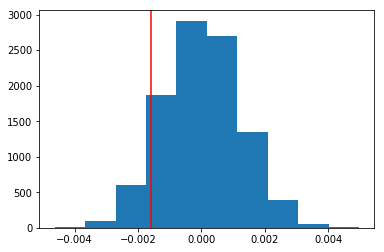

In [39]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [40]:
(p_diffs>obs_diff).mean()

0.90669999999999995

<font color=red>k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<font color=#2267B6>*Part j just computed the p_value. When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null. By comparing our p-value to our type I error threshold (α), we can make our decision about which hypothesis we will choose. The p_value is equal to 0.90 and we have our alpha rate(type1 error threthold) equal to 0.05. So this suggests that the difference in conversion rate between the old page and the new page is not statistical significant and we fail to reject the null hypothesis where it states that the conversion rate on the old page is better than the converion rate on the new page, and this also suggests that we should keep the old page layout.*

<font color=red>l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = df2_control.query('converted==1').shape[0]
convert_new = df2_treatment.query('converted==1').shape[0]
n_old = df2_control.shape[0]
n_new = df2_treatment.shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<font color=red>m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [42]:
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stat, pval = proportions_ztest(counts, nobs)
print('pval= {0:0.3f}'.format(pval))
print('stat= {0:0.3f}'.format(stat))

pval= 0.190
stat= 1.311


<font color=red>n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

*The result of p_value differs from what was computed in part j and part k and it resulted in p_value 0.19 which is still higher than our alpha rate 0.05 and this means we fail to reject the null hypothesis. The probable cause is that the previous ztest method calculates the pvalue of two sided null hypothesis and not one side null hypothesis.*

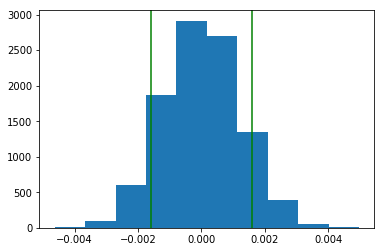

In [47]:
#the stats proportions ztest method calculated the proportion of the area lower than 
#the lower limit and the area higher than the upper limit
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color='green')
plt.axvline(x=-1*obs_diff,color='green');

In [48]:
#to adjust for pvalue ofstats.proportions ztest to be one side like in our null hypothesis
1-(0.190/2)

0.905

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

<font color=red>a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since our response variable is a categorical variable with only two possible outcome then this is a case for logistic regression**

<font color=red>b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [49]:
#creating intercept column 
df2['intercept']=1

In [50]:
#creating dummy variables for the landing page 
df2[['ab_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


<font color=red>c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [51]:
#fitting the logistic regression model
log_m=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=log_m.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<font color=red>d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:               8.077e-06
Time:                        07:34:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [53]:
#on receiving the new_page, the chance of conversion is 0.9851 times more likely 
#than on receiving the old_page but as seen in the table the results are not statistically significant
np.exp(-0.0150)

0.98511193960306265

<font color=#2267B6>
on receiving the new_page, the chance of conversion is 0.9851 times more likely 
than on receiving the old_page but again the p value is not statistical signficant.    

<font color=red>e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

<font color=#2267B6>
For our regression model, the null hypothesis: the  difference in conversion rate wether the user received the old or the new page=0, and the alternate hypothesis: the difference wether the user receives old or new page is not equal to 0. so here it is a two sided p_value and not one sided. <br>
For our part2, the null hypothesis was that the converion rate in the old page is better then the new page and the alternate hypothesis was the conversion rate on the new page is higher that that of the old page.That is why the 2 p values are not the same

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font color=#2267B6>
First of all, the factor that we choose to predict the converion rate came out with a poor p_value that indicates it is not statistical significant in predicting our response variable. So we can rely on this independent variable and we need to search for a new independent variable to replace the old independent variable or to use both of them if together they give statiscal significant results.<br><br>

I think the main disadvantage of adding new terms is the problem of multicollinearity where the independent varaiable are dependent on each other and this could affect greatly our results to a possible degree that we can not rely on them.so we need to be cautious.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [54]:
#importing the countries file
df_countries=pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [55]:
#joining the two dataframes and using the user id as their common index
df2=df2.set_index('user_id').join(df_countries.set_index('user_id'))

In [56]:
#making sure the joining was correct
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country
user_id,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US


In [57]:
#figuring out how many countries do i have
df2['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [58]:
df2[['CA','UK','US']]=pd.get_dummies(df2['country'])

In [59]:
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country,CA,UK,US
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,0,0,1


In [60]:
log_m2=sm.Logit(df2['converted'],df2[['intercept','CA','UK']])
results2=log_m2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:               1.521e-05
Time:                        07:41:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [61]:
#being in CA, the chance of conversion is 0.96 times more likely than being from US
#again the pvalue is not statistical significant
np.exp(-0.0408)

0.96002111497165088

In [62]:
#being in UK, the chance of conversion is 1.0099 times more likely 
#than being from US
#again the pvalue is not statistical significant
np.exp(0.0099)

1.0099491671175422

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [63]:
log_m3=sm.Logit(df2['converted'],df2[['intercept','ab_page','CA','UK']])
results3=log_m3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Feb 2020   Pseudo R-squ.:               2.323e-05
Time:                        07:42:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [12]:
#on receiving the new_page, the chance of conversion is 0.9852 times more likely 
#than on receiving the old_page 
np.exp(-0.0149)

0.9852104557227469

In [9]:
#being in CA, the chance of conversion is 0.9600 times more likely 
#than being from US
#again the pvalue is not statistical significant
np.exp(-0.0408)

0.96002111497165088

In [10]:
#being in UK, the chance of conversion is 1.0099 times more likely 
#than being from US
#again the pvalue is not statistical significant
np.exp(0.0099)

1.0099491671175422

<font color=#2267B6>On receiving the new_page, the chance of conversion is 0.9852 times more likely than on receiving the old_page.<br>
Being in CA, the chance of conversion is 0.9600 times more likely than being from US again the pvalue is not statistical significant<br>
Being in UK, the chance of conversion is 1.0099 times more likely  than being from US again the pvalue is not statistical significant

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0